In [9]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset("era5_t2m_20250101_fr.nc")

print(ds)

# Variable de température = t2m
var_name = "t2m"

# Sélectionner le premier instant (dim = valid_time)
da = ds[var_name].isel(valid_time=0)



<xarray.Dataset> Size: 257kB
Dimensions:     (valid_time: 24, latitude: 43, longitude: 62)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2025-01-01 ... 2025-01-01T23...
  * latitude    (latitude) float64 344B 51.5 51.25 51.0 ... 41.5 41.25 41.0
  * longitude   (longitude) float64 496B -5.5 -5.25 -5.0 -4.75 ... 9.25 9.5 9.75
    expver      (valid_time) <U4 384B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 256kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-06T10:55 GRIB to CDM+CF via cfgrib-0.9.1...


In [10]:
# Convertir en °C (Kelvin)
if hasattr(ds[var_name], "units") and ds[var_name].units in ["K", "kelvin"]:
    da = da - 273.15
    units = "°C"
else:
    units = getattr(ds[var_name], "units", "")

print(ds[var_name])

<xarray.DataArray 't2m' (valid_time: 24, latitude: 43, longitude: 62)> Size: 256kB
[63984 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2025-01-01 ... 2025-01-01T23...
  * latitude    (latitude) float64 344B 51.5 51.25 51.0 ... 41.5 41.25 41.0
  * longitude   (longitude) float64 496B -5.5 -5.25 -5.0 -4.75 ... 9.25 9.5 9.75
    expver      (valid_time) <U4 384B ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2666
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:             

In [11]:
print(da)

<xarray.DataArray 't2m' (latitude: 43, longitude: 62)> Size: 11kB
array([[12.107819  , 11.9808655 , 11.7308655 , ...,  1.754303  ,
         1.2796936 ,  1.0550842 ],
       [12.211334  , 12.123444  , 12.029694  , ...,  0.40664673,
         0.09805298, -0.02694702],
       [12.201569  , 12.131256  , 12.049225  , ..., -0.5249939 ,
        -0.6636658 , -0.6499939 ],
       ...,
       [-1.4234314 , -1.8648376 , -2.5132751 , ..., 11.31485   ,
        11.812897  , 13.639069  ],
       [-2.2183533 , -2.0914001 , -2.1636658 , ..., 10.961334  ,
        11.635162  , 13.670319  ],
       [-1.7281189 , -1.6539001 , -2.105072  , ...,  6.863678  ,
         9.767975  , 12.801178  ]], shape=(43, 62), dtype=float32)
Coordinates:
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2025-01-01
  * latitude    (latitude) float64 344B 51.5 51.25 51.0 ... 41.5 41.25 41.0
  * longitude   (longitude) float64 496B -5.5 -5.25 -5.0 -4.75 ... 9.25 9.5 9.75
    expver      <U4 16B ...


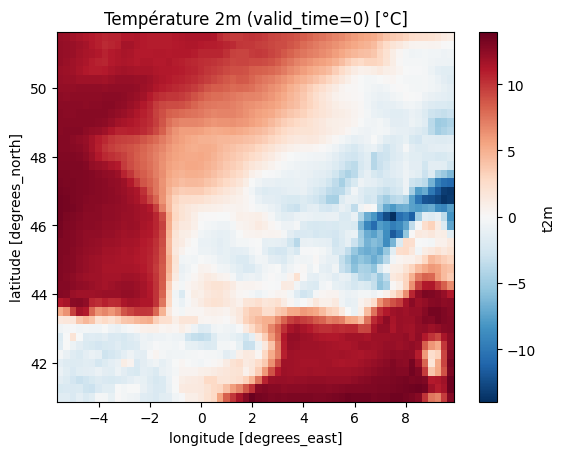

In [12]:
plt.figure()
da.plot()
plt.title(f"Température 2m (valid_time=0) [{units}]")
plt.show()

In [13]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point



# ATTENTION NE PAS LANCER LE CODE EN DESSOUS C'EST POUR LA CREATION DU SHX, ET C'EST DEJA FAIT

In [ ]:
import fiona
print(fiona.listlayers("ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-11-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2025-11-00136/ADE_4-0_GPKG_LAMB93_FXX-ED2025-11-20/ADE_4-0_GPKG_LAMB93_FXX-ED2025-11-20.gpkg"))


DriverError: Failed to open dataset (flags=68): ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-11-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2025-11-00136/ADE_4-0_GPKG_LAMB93_FXX-ED2025-11-20/ADE_4-0_GPKG_LAMB93_FXX-ED2025-11-20.gpkg

In [ ]:
from pathlib import Path

# Path to your GeoPackage
gpkg_file = Path("ADMIN-EXPRESS_4-0__GPKG_LAMB93_FXX_2025-11-20/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2025-11-00136/ADE_4-0_GPKG_LAMB93_FXX-ED2025-11-20/ADE_4-0_GPKG_LAMB93_FXX-ED2025-11-20.gpkg")

# Output folder
output_folder = Path("daaata")
output_folder.mkdir(parents=True, exist_ok=True)

# List all layers in the GeoPackage
layers = fiona.listlayers(gpkg_file)
print(f"Found layers: {layers}")

# Loop through each layer and save it as a separate shapefile
for layer in layers:
    print(f"Processing layer: {layer}")
    gdf = gpd.read_file(gpkg_file, layer=layer)
    output_file = output_folder / f"{layer}.shp"
    gdf.to_file(output_file)
    print(f"Saved: {output_file}")

print("All layers have been extracted successfully!")


/tmp/ipykernel_21248/808004242.py:11: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  france_poly = gdf.unary_union


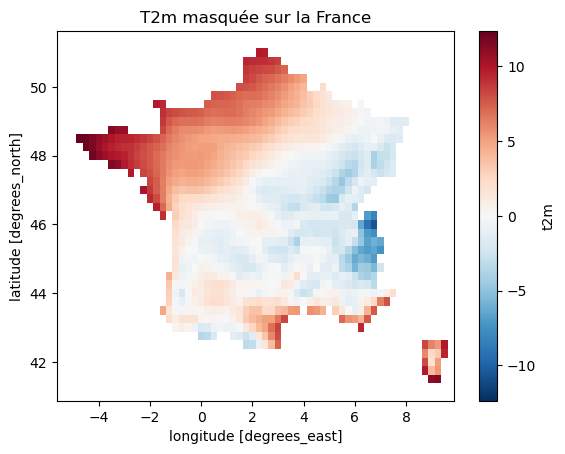

In [ ]:
lats = ds["latitude"].values   # shape (43,)
lons = ds["longitude"].values  # shape (62,)

france = gpd.read_file("daaata/region.shx")


# S'assurer qu'on est en WGS84 (lat/lon degrees)
gdf = france.to_crs("EPSG:4326")

# Union de tous les polygones France (métropole + éventuels DOM)
france_poly = gdf.unary_union

# 3. Construire la grille des points centres des pixels
lon2d, lat2d = np.meshgrid(lons, lats)  # lon: axe x, lat: axe y

# Aplatir pour tester en bloc
points = [Point(x, y) for x, y in zip(lon2d.ravel(), lat2d.ravel())]

# 4. Test point-in-polygon pour chaque point

#ligne très lente, à essayer de vectoriser.
mask_flat = np.array([france_poly.contains(p) for p in points])
#
mask = mask_flat.reshape(lat2d.shape)  # shape (latitude, longitude)

# 5. Appliquer le masque à la température
t2m = ds["t2m"]  # (valid_time, latitude, longitude)
t2m_fr = t2m.where(mask)

da = t2m_fr.isel(valid_time=0)
if hasattr(ds[var_name], "units") and ds[var_name].units in ["K", "kelvin"]:
    da = da - 273.15
    units = "°C"
else:
    units = getattr(ds[var_name], "units", "")
plt.figure()
da.plot()
plt.title("T2m masquée sur la France")
plt.show()